# HW 2: Apply Linear Regression to Construct a Prostate Cancer Model & Digits Data Model

Blanca Miller
<br>
STAT 760
<br>
02/06/2018

Prostrate Data Info: http://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.info.txt 
<br>
Data Set: http://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data

Given a training set of prostate cancer linear data, estimate the model parameters using subset selection. 

## STEPS
1. import data
2. break data into two groups: train and test
3. break the training set into two matrices
    - X : design matrix (add column of 1s at beginning)
    - y : vector of responses
4. convert the X and y data frames into numpy arrays
5. standardize the predictors to have unit variance
6. estimate weights
7. calculate RSS for training set for all possible models
8. Graph k by RSS


## FUNCTIONS
- Fxn evaluates RSS for given X, y, beta
- Fxn trains models given list of columns
- Fxn generates all possible list of columns
- Fxn plot dictionary

## Imports

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
data = pd.read_csv('prostate.data', delimiter='\t')

In [3]:
print(data[0:10])

   Unnamed: 0    lcavol   lweight  age      lbph  svi       lcp  gleason  \
0           1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6   
1           2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6   
2           3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7   
3           4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6   
4           5  0.751416  3.432373   62 -1.386294    0 -1.386294        6   
5           6 -1.049822  3.228826   50 -1.386294    0 -1.386294        6   
6           7  0.737164  3.473518   64  0.615186    0 -1.386294        6   
7           8  0.693147  3.539509   58  1.536867    0 -1.386294        6   
8           9 -0.776529  3.539509   47 -1.386294    0 -1.386294        6   
9          10  0.223144  3.244544   63 -1.386294    0 -1.386294        6   

   pgg45      lpsa train  
0      0 -0.430783     T  
1      0 -0.162519     T  
2     20 -0.162519     T  
3      0 -0.162519     T  
4      0  0.371564     T  
5

## Functions

In [4]:
#evaluates RSS for given X, y, beta
def evaluateRSS(df, predictor_subset, beta):
    
    # generate predictor df
    predictor_df = df[predictor_subset]
    
    # generate response df
    response_df = df["lpsa"]
    
    # convert predictor df to ndarray
    predictor_matrix = predictor_df.as_matrix()
    
    # normalize predictors
    predictor_matrix = (predictor_matrix - np.mean(predictor_matrix, axis=0))/np.std(predictor_matrix, axis=0)

    # adds constant term 1s to predictor matrix
    predictor_matrix = np.c_[np.ones(len(predictor_matrix)), predictor_matrix]
    
    # convert response df to ndarray
    response_matrix = response_df.as_matrix()
    
    # compute error
    e = response_matrix - np.dot(predictor_matrix, beta)
    
    # return error
    return np.dot(e,e)

In [5]:
# train model given a list of columns
def train(df, predictors_subset):
    
    # generate predictor df
    predictor_df = df[predictors_subset]
    
    # generate response df
    response_df = df["lpsa"]
    
    # convert predictor df to ndarray
    predictor_matrix = predictor_df.as_matrix()
    
    # normalize predictors
    predictor_matrix = (predictor_matrix - np.mean(predictor_matrix, axis=0))/np.std(predictor_matrix, axis=0)

    # adds constant term 1s to predictor matrix
    predictor_matrix = np.c_[np.ones(len(predictor_matrix)), predictor_matrix]
    
    # convert response df to ndarray
    response_matrix = response_df.as_matrix()
    
    # fit model by pinv:
    # calculate psuedo-inverse
    predictor_inverse = np.linalg.pinv(predictor_matrix)
    
    # multiply pseudo-inverse by response matrix
    beta = np.dot(predictor_inverse, response_matrix)
    
    # return weights
    return beta

In [6]:
# generates all possible list of columns for each subset
def generate_columns(predictors):
    
    # return all possible subset of predictors - n choose k
    n = len(predictors)
    
    subsets = []
    
    for k in range(1, n+1):
        x = list(itertools.combinations(predictors, k))
        x = [list(y) for y in x]
        subsets += x 
        
    return subsets

In [7]:
def plot(rss_dict):
    
    # plots subset by rss
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x = rss_dict[:,0]
    y = rss_dict[:,1]
    ax.scatter(x,y)
    plt.show()

## Part A: Prostate Cancer Model

## Train Prostate Cancer Models

In [8]:
predictors = list(data.columns.values[1:9])

In [9]:
train_data = data[data.train == 'T']
test_data = data[data.train == 'F']

In [10]:
# generate all possible subsets for each feature/predictor
predictor_subsets = generate_columns(predictors)

# create rss list for models
rss_values = {k:[] for k in range(1,9)}

In [11]:
# loop through each possible subset and evaluate model using RSS
for p in predictor_subsets:
    beta = train(train_data, p)
    rss = evaluateRSS(train_data, p, beta)
    rss_values[len(p)].append(rss)

In [12]:
rss_values

{1: [44.52858265645385,
  73.61354018577535,
  91.29203902075545,
  89.6249120824595,
  66.42240272124414,
  73.23939131621876,
  84.99179045937804,
  76.95323667726328],
 2: [37.09184563256133,
  44.49564216406742,
  39.992304351212326,
  42.312584301379616,
  44.467567998531834,
  44.42407814925551,
  43.423103787681725,
  73.02809721663817,
  73.30545953026837,
  51.71424679247038,
  56.768034339535895,
  63.059181884423296,
  57.17505436694025,
  87.19740958460599,
  64.04402877355481,
  71.20885786684386,
  83.82743209991773,
  75.82463948049298,
  55.044014020601956,
  64.13796233605989,
  78.88833726654123,
  69.58229505571396,
  64.08880284794321,
  63.29493486325811,
  62.3627027819563,
  71.7499510631744,
  70.60350952073094,
  76.9508832065669],
 3: [36.81722941600002,
  36.01516710570593,
  34.90774885656786,
  37.089787447798514,
  36.65849242770233,
  35.4340332399862,
  39.80230920229578,
  42.244606971046714,
  44.43777353564316,
  44.41517465851808,
  43.4230167867251,

## Plot RSS for Subsets

Text(0,0.5,u'Residual Sum-Of-Squares')

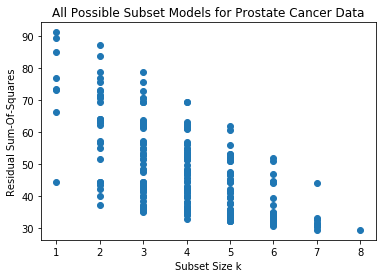

In [13]:
# set x values according to the key and corresponding length of its dictionary
x = [j for j in range(1,9) for k in range(len(rss_values[j]))]

# set y values to k subsets(1-8)
y = []
for k in rss_values.keys():
    y += rss_values[k]

# graph scatter plot
plt.scatter(x,y)
plt.title("All Possible Subset Models for Prostate Cancer Data")
plt.xlabel("Subset Size k")
plt.ylabel("Residual Sum-Of-Squares")

## Part B: Digits Data Model

In [14]:
# Load the data set
digits = datasets.load_digits()

# Training data set
X_digits = digits.data

# Target data set 
y_digits = digits.target

# Allocate 2/3 of the data set as training & 1/3 as testing
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33)

# Print size of data subsets to verify splitting
print("Digits data set: {}".format(digits.data.shape))
print("X_train data set: {}".format(X_train.shape))
print("y_train target array: {}".format(y_train.shape))
print("X_test data set: {}".format(X_test.shape))
print("y_test target array: {}".format(y_test.shape))

Digits data set: (1797, 64)
X_train data set: (1203, 64)
y_train target array: (1203,)
X_test data set: (594, 64)
y_test target array: (594,)


In [15]:
# Create a linear regression object
regr = linear_model.LinearRegression()

# Fit the linear model to the training data set
regr.fit(X_train, y_train)

# Predict using the test set
y_pred = regr.predict(X_test)

print(regr.coef_)

[-1.60313025e-16  1.09051980e-01 -4.40810785e-03 -3.66124952e-02
  6.08501962e-02 -1.62095131e-02 -1.85927355e-02  7.71109335e-03
  2.73780644e+00 -7.46192760e-02  9.39752704e-02  6.80739937e-02
 -7.25498116e-02 -5.21401756e-02  6.88859520e-02  2.40199648e-01
 -1.63828066e+00  3.49217338e-02  7.26996113e-02 -5.65024172e-02
 -7.62136354e-02  3.14122387e-02 -4.25293247e-02 -3.84839360e-01
 -3.51417936e-01 -1.46506289e-01  2.11924607e-02  9.42052179e-02
  7.90579902e-02  9.72564598e-02 -4.55958363e-02 -2.40986921e+00
  1.20459198e-14 -1.36389603e-01  8.27076977e-03  1.26057101e-01
 -3.45829646e-02  2.13558089e-02 -1.77039686e-02  1.57651669e-14
  2.60580439e-02  1.06205768e-01 -4.11633666e-02  7.16049974e-03
  1.01349549e-01  5.45490985e-02  1.66278999e-02  1.18802066e-01
  6.55330508e-01  2.84204827e-02  3.30721266e-03 -8.41376235e-02
 -2.00414046e-01 -3.88953902e-02  1.15881789e-01 -1.92212641e-01
  0.00000000e+00 -1.26284722e-01  6.51107117e-03 -4.48739394e-02
 -8.96572628e-03 -8.17033

In [16]:
# Residual sum of squares
np.sum((regr.predict(X_test) - y_test)**2)

2247.5064494721983

In [17]:
# Explained variance score: 1 is a perfect prediction & 0 is no linear relationship between X and y
reg_score = regr.score(X_test, y_test)
reg_score

0.5481668249516408